# Springboard Data Science Intensive Data Story: James Dolan & The Knicks

For my Data Story project, I've decided to take Fivethirtyeight's NBA Elo Ratings and examine how the Knicks have fared since James Dolan took over in 1999. The source data comes from Fivethirtyeight's GitHub page.

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime as datetime
import numpy as np
import seaborn as sns

In [98]:
data = pd.read_csv(r'/Users/michaelcaruana/Desktop/springboard_dsi/nbaallelo.csv')
data['date_game'] = pd.to_datetime(data.date_game,format = '%m/%d/%Y')
data.columns.unique()

array(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'], dtype=object)

In [99]:
knicks_dolan = data[(data.date_game >= '1999-07-01') & (data.team_id == 'NYK')]
knicks_dolan.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
85236,42619,199911020NYK,NBA,0,2000,1999-11-02,1,0,NYK,Knicks,...,50.849915,CLE,Cavaliers,84,1468.3152,1464.9763,H,W,0.783293,NaN
85251,42626,199911030CHI,NBA,1,2000,1999-11-03,2,0,NYK,Knicks,...,51.524223,CHI,Bulls,74,1392.7284,1385.8768,A,W,0.642907,NaN
85279,42640,199911050DET,NBA,1,2000,1999-11-05,3,0,NYK,Knicks,...,52.891933,DET,Pistons,91,1556.9680,1542.8743,A,W,0.421164,NaN
85295,42648,199911060CLE,NBA,1,2000,1999-11-06,4,0,NYK,Knicks,...,51.829468,CLE,Cavaliers,102,1482.0874,1493.0594,A,L,0.548393,NaN
85327,42664,199911080NYK,NBA,0,2000,1999-11-08,5,0,NYK,Knicks,...,52.329735,MIL,Bucks,101,1541.0953,1535.9503,H,W,0.719632,NaN


In [100]:
knicks_dolan_elo = knicks_dolan.loc[:,['game_id','date_game','is_playoffs','team_id','elo_i','elo_n','year_id']]

In [101]:
knicks_dolan_elo.head()

,game_id,date_game,is_playoffs,team_id,elo_i,elo_n,year_id
85236,199911020NYK,1999-11-02,0,NYK,1591.5360,1594.8749,2000
85251,199911030CHI,1999-11-03,0,NYK,1594.8749,1601.7264,2000
85279,199911050DET,1999-11-05,0,NYK,1601.7264,1615.8202,2000
85295,199911060CLE,1999-11-06,0,NYK,1615.8202,1604.8481,2000
85327,199911080NYK,1999-11-08,0,NYK,1604.8481,1609.9932,2000


In [104]:
knicks_dolan_elo['indexed'] = knicks_dolan_elo.elo_n/knicks_dolan_elo.elo_i.iloc[0]
knicks_dolan_elo['indexed'] = knicks_dolan_elo['indexed'].shift(1).fillna(1)
knicks_dolan_elo.head()

,game_id,date_game,is_playoffs,team_id,elo_i,elo_n,year_id,indexed
85236,199911020NYK,1999-11-02,0,NYK,1591.5360,1594.8749,2000,1.000000
85251,199911030CHI,1999-11-03,0,NYK,1594.8749,1601.7264,2000,1.002098
85279,199911050DET,1999-11-05,0,NYK,1601.7264,1615.8202,2000,1.006403
85295,199911060CLE,1999-11-06,0,NYK,1615.8202,1604.8481,2000,1.015258
85327,199911080NYK,1999-11-08,0,NYK,1604.8481,1609.9932,2000,1.008364


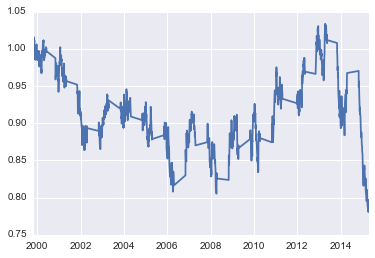

In [105]:
plt.plot(sns.set_style("darkgrid")
bar_plot = sns.barplot(x=budget["detail"],y=budget["amount"],
                        palette="muted",
                        x_order=budget["detail"].tolist()).date_game,knicks_dolan_elo.indexed)

In [119]:
sns.set_style("darkgrid")
boxplot = sns.boxplot(x=knicks_dolan_elo["team_id"],y=knicks_dolan_elo["indexed"],palette="muted")

TypeError: boxplot() missing 1 required positional argument: 'vals'